### Imports

In [1]:
import os
import re
# import PyPDF2
import pdfplumber
import pandas as pd
import numpy as np

### Function to extract text from PDFs 

In [2]:
# Define a function to extract information from a PDF
def extract_information(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        resume_text = ""
        for page in pdf.pages:
            resume_text = " ".join([resume_text, page.extract_text()])
    resume_text = resume_text.strip()
    return resume_text

### Defining Regex to extract Skills & Education from extracted resume text

In [3]:
# Define a function to extract Skills, and Education
def extract_details(resume_text):
    # Define regular expressions to extract Skills & Education
    skills_pattern = r'Skills\n([\s\S]*?)(?=\n[A-Z]|$)' 
    education_pattern = r'Education\n([\s\S]*?)(?=\n[A-Z][a-z]*\n|$)'
    
    # Get Skills & Education
    skills_match = re.findall(skills_pattern, resume_text, re.DOTALL)
    education_match = re.findall(education_pattern, resume_text, re.DOTALL)
    
    # Skills & Education
    if len(skills_match)!=0:
        skills = skills_match[0]
    else:
        skills_pattern = r'skills\n((?:.*)*)' 
        skills_match = re.findall(skills_pattern, resume_text, re.DOTALL)
        if len(skills_match)!=0:
            skills = skills_match[0]
        else:
            skills = None
            
    if len(education_match)!=0:
        education = education_match[0]
    else:
        education = None
    
    return {
        'Skills': skills,
        'Education': education
    }

### Extracting CVs

In [4]:
%%time

data_folder = 'data'
resume_data = []

# Iterate through sub-folders and PDF files
for category_folder in os.listdir(data_folder):
    category_path = os.path.join(data_folder, category_folder)
    if os.path.isdir(category_path):
        for pdf_file in os.listdir(category_path):
            if pdf_file.endswith('.pdf'):
                pdf_path = os.path.join(category_path, pdf_file)
                # print(pdf_path)
                text = extract_information(pdf_path)
                details = extract_details(text)
                
                # Adding Category & ID
                details['ID'] = pdf_file.replace('.pdf', '')
                details['Category'] = category_folder
                
                # print(f'File: [{pdf_path}]')
                # print(details, end='\n\n')
                resume_data.append(details)
                
print('PDF Extraction Done!')

PDF Extraction Done!
CPU times: user 8min 50s, sys: 3.76 s, total: 8min 54s
Wall time: 8min 57s


In [5]:
resume_df = pd.DataFrame(resume_data)
resume_df.to_csv('./pdf_extracted_skills_education.csv', index=False)

In [6]:
resume_df.shape

(2484, 4)

### Analyzing Null Values

In [7]:
import pandas as pd
df = pd.read_csv('./pdf_extracted_skills_education.csv')
df.isna().sum()

# It seems that Education was not extracted properly

Skills        91
Education    590
ID             0
Category       0
dtype: int64

In [8]:
# We have 15 Resumes where Skills & Education were not extracted
# So, let's remove them

print(df[(df.Skills.isna() & df.Education.isna())])

     Skills Education        ID                Category
141     NaN       NaN  14248724                    ARTS
261     NaN       NaN  16280971                   SALES
658     NaN       NaN  15499825              HEALTHCARE
1201    NaN       NaN  29051656  INFORMATION-TECHNOLOGY
1298    NaN       NaN  20237244  INFORMATION-TECHNOLOGY
1525    NaN       NaN  14849103            CONSTRUCTION
1554    NaN       NaN  14014749                DESIGNER
1607    NaN       NaN  90066849                DESIGNER
1758    NaN       NaN  17576030                 FITNESS
1760    NaN       NaN  21178545                 FITNESS
1828    NaN       NaN  77266989                 FITNESS
1934    NaN       NaN  12632728    BUSINESS-DEVELOPMENT
2082    NaN       NaN  31225895                 APPAREL
2183    NaN       NaN  17021141                ADVOCATE
2388    NaN       NaN  20566550             ENGINEERING


In [9]:
# We are left with 2469 resumes after removing those 15 resumes with null data in both of them

print(df[~(df['Skills'].isna() & df['Education'].isna())].shape)

cv_df = df[~(df['Skills'].isna() & df['Education'].isna())].reset_index(drop=True)
cv_df.head()

(2469, 4)


,Skills,Education,ID,Category
0,Excellent classroom managementÂ,Subject Matter Authorization in Science: Scien...,37201447,AGRICULTURE
1,"Team mediation, Budget Management, Delegation ...","2009 Howard University ï¼​ City , State , USA ...",12674256,AGRICULTURE
2,"COMPUTER LITERACY, E-mail, English, government...","2011\nThe Universty of Zambia ï¼​ City , State...",29968330,AGRICULTURE
3,"C, C++, communication skills, designing, ELISA...","Masters of Science , Biotechnology 5 2013 Univ...",81042872,AGRICULTURE
4,"Data Entry, Printers, Clients, Loans, Tax Retu...",Wayne State University 2013 MBA : Linguistics ...,20006992,AGRICULTURE


In [10]:
# New number of null values in Skills & Education Section
cv_df.isna().sum()

Skills        76
Education    575
ID             0
Category       0
dtype: int64

In [11]:
# Null values in Skills Section
cv_df[cv_df.Skills.isna()]

,Skills,Education,ID,Category
34,NaN,Bachelor of Arts : Criminal Justice California...,27689009,AGRICULTURE
51,NaN,"Ph.D : Soil, Water and Environmental Science 2...",24001783,AGRICULTURE
61,NaN,"Master : Accounting (GPA 3.7) , 2009 McCombs S...",56068028,AGRICULTURE
69,NaN,2014\nBachelor of Science : Recording Arts Ful...,66226673,ARTS
80,NaN,"Association Youth Art Month Exhibition, Young ...",11555549,ARTS
...,...,...,...,...
2331,NaN,Bachelor of Science : Electrical and Computer ...,12748557,ENGINEERING
2346,NaN,"Ph. D : Mechanical Engineering , April, 2015 U...",35172961,ENGINEERING
2362,NaN,Graduate Certificate : Project Management 2010...,28631840,ENGINEERING
2371,NaN,Master of Science : Mechanical Engineering Dec...,77828437,ENGINEERING


In [12]:
# Null values in Education Section
cv_df[cv_df.Education.isna()]

,Skills,Education,ID,Category
12,Time Management,NaN,28165687,AGRICULTURE
16,"Deep expertise in designing,developing,\nimple...",NaN,11813872,AGRICULTURE
22,"Customer service, art, clerical, doors, specia...",NaN,79536879,AGRICULTURE
29,Production and Processing Â Basic computer skills,NaN,16849128,AGRICULTURE
31,Strong interpersonal skills,NaN,38216888,AGRICULTURE
...,...,...,...,...
2458,"vehicle repairs, database, inventory, marketin...",NaN,16332293,AUTOMOBILE
2460,Professional and friendly.Careful and active l...,NaN,23522150,AUTOMOBILE
2464,Claims file management processes,NaN,11257723,AUTOMOBILE
2465,Quality control Solid communication skills,NaN,11797122,AUTOMOBILE


### Distribution of Different Resumes

In [13]:
cv_df.Category.value_counts()

Category
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
FINANCE                   118
CHEF                      118
INFORMATION-TECHNOLOGY    118
AVIATION                  117
ADVOCATE                  117
ENGINEERING               117
BANKING                   115
CONSULTANT                115
SALES                     115
HEALTHCARE                114
FITNESS                   114
PUBLIC-RELATIONS          111
CONSTRUCTION              111
HR                        110
DESIGNER                  105
TEACHER                   102
ARTS                      102
DIGITAL-MEDIA              96
APPAREL                    96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

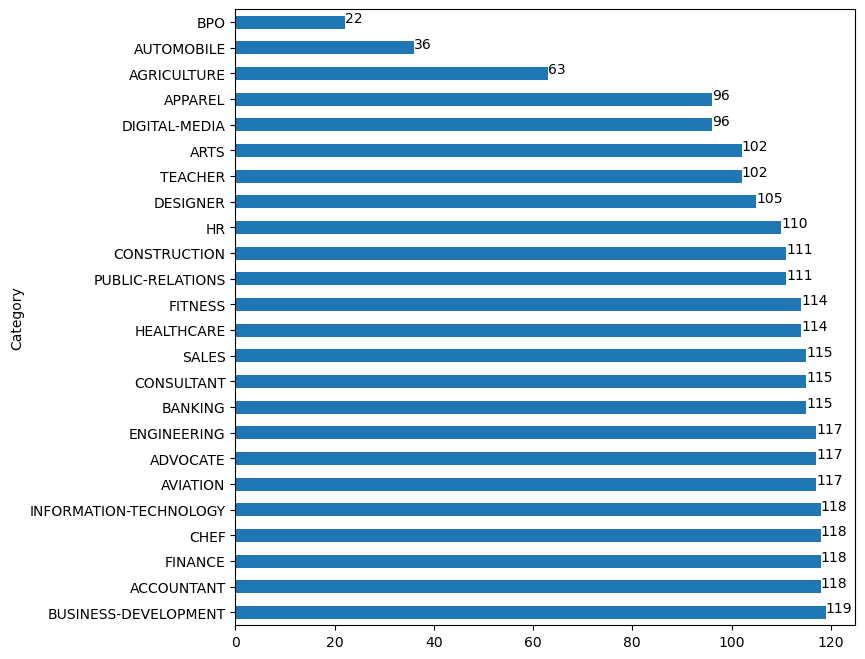

In [14]:
# We can see here the distribution of different CV categories

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
cv_df.Category.value_counts().plot(kind='barh')
for index, value in enumerate(cv_df.Category.value_counts().values):
    plt.text(value, index, str(value))
plt.show();